# 데이터 불러오기

In [56]:
# from google.colab import drive
# drive.mount('/content/drive')

- 시드값

In [3]:
SEED = 42

- 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

DATA_PATH = "C:/Users/user/Desktop/데이터분석/05 Project_Final/Data/"
train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

- 공통 피처 파일 불러오기

In [2]:
DATA_PATH = "C:/Users/user/Desktop/데이터분석/05 Project_Final/Feature_csv/"
train_ft = pd.read_csv(f"{DATA_PATH}train_common_v3.2_1107.csv")
test_ft = pd.read_csv(f"{DATA_PATH}test_common_v3.2_1107.csv")

train_ft.shape , test_ft.shape

((14940, 1455), (12225, 1455))

# 결측치 처리

In [4]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [5]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 1454), (12225, 1454))

- 추가 피처 만들어 보기

In [62]:
# cols = [ col for col in train_ft.columns if col.startswith("pivot_cnt_") ]

# train_ft["중분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
# train_ft["중분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
# train_ft["중분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["중분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
# test_ft["중분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
# test_ft["중분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

## Feature Encoding

In [6]:
cols = train_ft.select_dtypes("object").columns.tolist()
train_ft[cols].nunique()

주구매지점        4
주구매_대분류     22
주구매_중분류    238
dtype: int64

In [7]:
import category_encoders as ce

enc = ce.one_hot.OneHotEncoder()
tmp = enc.fit_transform(train_ft[["주구매지점"]])
train_ft = pd.concat([train_ft,tmp],axis =1)

tmp = enc.transform(test_ft[["주구매지점"]])
test_ft = pd.concat([test_ft,tmp],axis =1)

train_ft.shape, test_ft.shape

((14940, 1458), (12225, 1458))

In [8]:
import category_encoders as ce

enc = ce.count.CountEncoder()
# train_ft["주구매지점_cnt"] = enc.fit_transform(train_ft[["주구매지점"]])
# test_ft["주구매지점_cnt"] = enc.transform(test_ft[["주구매지점"]])

train_ft["주구매_중분류_cnt"] = enc.fit_transform(train_ft[["주구매_중분류"]])
test_ft["주구매_중분류_cnt"] = enc.transform(test_ft[["주구매_중분류"]])

train_ft["주구매_대분류_cnt"] = enc.fit_transform(train_ft[["주구매_대분류"]])
test_ft["주구매_대분류_cnt"] = enc.transform(test_ft[["주구매_대분류"]])
train_ft.shape, test_ft.shape

((14940, 1460), (12225, 1460))

- 문자열 피처 삭제

In [9]:
cols

['주구매지점', '주구매_대분류', '주구매_중분류']

In [10]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 1457), (12225, 1457))

In [11]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Feature Scaling

- 가중치 적용

In [69]:
train_ft["18시_21시_구매비율"] = train_ft["18시_21시_구매비율"] * 3
train_ft["18시_21시_구매횟수"] = train_ft["18시_21시_구매횟수"] * 3

test_ft["18시_21시_구매비율"] = test_ft["18시_21시_구매비율"] * 3
test_ft["18시_21시_구매횟수"] = test_ft["18시_21시_구매횟수"] * 3

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

,내점일수,구매주기,주말방문비율,평일방문비율,주말방문횟수,평일방문횟수,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,...,공휴일_대분류_영플라자_구매횟수,공휴일_대분류_잡화_구매횟수,공휴일_대분류_케주얼_구두_아동_구매횟수,공휴일_대분류_패션잡화_구매횟수,주구매지점_1,주구매지점_2,주구매지점_3,주구매지점_4,주구매_중분류_cnt,주구매_대분류_cnt
0,-0.369867,0.002987,0.257728,-0.257728,-0.230862,-0.390544,-1.029777,0.001191,0.838272,0.338186,...,-0.162079,-0.286379,-0.209907,-0.213001,1.654066,-0.623175,-0.612523,-0.468181,-0.741478,-1.315250
1,0.144110,-0.356452,-1.008554,1.008554,-0.619841,0.412809,0.323951,-0.390607,0.620171,-0.552996,...,2.389509,-0.286379,-0.209907,4.161199,-0.604571,1.604686,-0.612523,-0.468181,-0.448069,-0.626416
2,1.943028,-0.869935,0.036742,-0.036742,1.616788,1.926821,0.798943,-0.514333,-0.304527,-0.059266,...,-0.162079,-0.286379,-0.209907,-0.213001,-0.604571,-0.623175,1.632592,-0.468181,-0.869072,1.064726
3,3.793345,-1.023980,-0.080558,0.080558,3.172703,4.429574,0.420933,-0.327474,0.008592,-0.135636,...,10.044273,-0.286379,1.301424,-0.213001,1.654066,-0.623175,-0.612523,-0.468181,1.515861,-0.248364
4,0.452496,-0.613193,0.302875,-0.302875,0.838830,0.567300,-0.752532,1.707410,-0.130285,-0.821561,...,-0.162079,4.377687,4.324087,-0.213001,1.654066,-0.623175,-0.612523,-0.468181,-0.847712,1.064726


# 정답 데이터

In [12]:
target = train_target["target"]

# cv 점수 확인해보기

### xgboost

In [ ]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

params = {'n_estimators': 800,
 'learning_rate': 0.04036413044768581,
 'max_depth': 4,
 'min_child_weight': 7,
 'subsample': 0.7505214930635562,
 'colsample_bytree': 0.6290102054237857,
 'gamma': 0.648553153047272}

# F1 매크로 스코어와 모델을 저장할 리스트
scores = []
models = []

# Stratified K-Fold 교차 검증 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 루프
for tri, vai in cv.split(train_ft, target):
    # 학습 데이터와 검증 데이터 분리
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    # 모델 초기화 및 학습
    model = XGBClassifier(**params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], verbose=False)   
    
    # 모델 저장
    models.append(model)

    # 예측 및 F1 매크로 스코어 계산
    pred = model.predict(x_valid)
    score = f1_score(y_valid, pred, average='macro')
    scores.append(score)

# F1 매크로 스코어의 평균 출력
print("Mean F1 Macro Score:", np.mean(scores))


# v3.0 원핫 + 스탠다드 : 0.7195019304392802
# submit_v3.0_02 : 원핫(주구매지점) + 카운트(주구매대분류, 주구매중분류) + 스탠다드  (0.7202916471187197)
# submit_v3.0_02 : 원핫(주구매지점) + 카운트(주구매대분류, 주구매중분류) + 스탠다드 + 가중치적용  ( 0.7202916471187197 )
# 3.2 셋다 카운트 + 스탠다드 (0.7184464536223091)

Mean F1 Macro Score: 0.7184464536223091


In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# cv = KFold(n_splits=5,shuffle=True, random_state=SEED)

# from lightgbm import LGBMClassifier

# model = LGBMClassifier(random_state=SEED)
# scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='f1_macro',n_jobs = -1)
# np.mean(scores)

In [ ]:
model = XGBClassifier(**params)
model.fit(train_ft,target)
pred = model.predict(test_ft)
submit["target"] = pred

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6290102054237857, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.648553153047272,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04036413044768581,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

- 예측 결과를 csv 파일로 저장하여 제출

In [49]:
DATA_PATH = 'C:/Users/user/Desktop/데이터분석/05 Project_Final/Submit_csv/'
submit.to_csv(f"{DATA_PATH}submit_v3.0_1106.csv",index=False)

## automl

In [ ]:
from flaml import AutoML
import xgboost 
from xgboost import XGBClassifier

auto_ml_ens = AutoML()
params = { "metric" : "macro_f1",
           "task" : "classification",
           "time_budget" : 60*70,
           "seed" : 42,
           "early_stop" : True,
           "eval_method": "cv",                 # 교차 검증
           "n_splits": 10,                      # Stratified K-Fold로 10분할 교차 검증
           "ensemble" : {'final_estimator' : XGBClassifier() },    # 메타모델이 로지스틱 회귀!
           "estimator_list" : ['catboost', 'lgbm', 'rf', 'xgboost', 'histgb', 'lrl1', 'lrl2']  }   # 앙상블에 사용할 모델 지정

auto_ml_ens.fit(train_ft, target, **params)

# 

## 피처셀렉션

In [ ]:
from tqdm.notebook import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []
for percentile in tqdm(range(1,101)):
    sp = SelectPercentile(percentile=percentile)
    x = sp.fit_transform(train_ft, target)
    score = cross_val_score(model, x, target, cv=cv, scoring="f1_macro", n_jobs=-1).mean()
    scores.append([percentile, score])
scores = np.array(scores)
idx = np.argmax(scores[:,1])
best_score = scores[idx]

sp = SelectPercentile(percentile=best_score[0])
sp.fit(train_ft,target)
best_cols = sp.get_feature_names_out()
len(best_cols)

  0%|          | 0/100 [00:00<?, ?it/s]

array(['내점일수', '구매주기', '주말방문비율', '평일방문비율', '주말방문횟수', '평일방문횟수', '봄_구매비율',
       '여름_구매비율', '겨울_구매비율', '주구매요일', '주구매_년', '주구매_월', '주구매_시간대',
       '일별평균구매횟수', '거래개월수', '9시_12시_구매비율', '12시_15시_구매비율', '18시_21시_구매비율',
       '9시_12시_구매횟수', '12시_15시_구매횟수', '18시_21시_구매횟수', '월초_구매횟수',
       '월말_구매횟수', '웨딩성수기_구매횟수', '1월_구매비율', '2월_구매비율', '3월_구매비율',
       '4월_구매비율', '5월_구매비율', '6월_구매비율', '7월_구매비율', '8월_구매비율', '10월_구매비율',
       '12월_구매비율', '1월_구매횟수', '2월_구매횟수', '3월_구매횟수', '4월_구매횟수', '5월_구매횟수',
       '6월_구매횟수', '7월_구매횟수', '8월_구매횟수', '9월_구매횟수', '10월_구매횟수', '11월_구매횟수',
       '12월_구매횟수', '1월_방문횟수', '2월_방문횟수', '3월_방문횟수', '4월_방문횟수', '5월_방문횟수',
       '6월_방문횟수', '7월_방문횟수', '8월_방문횟수', '9월_방문횟수', '10월_방문횟수', '11월_방문횟수',
       '12월_방문횟수', '공휴일_구매유무', '여름휴가_구매유무', '연말_구매유무', '여름휴가_구매비율',
       '연말_구매비율', '공휴일_구매횟수', '여름휴가_구매횟수', '연말_구매횟수', '1월_총구매금액',
       '2월_총구매금액', '3월_총구매금액', '4월_총구매금액', '5월_총구매금액', '6월_총구매금액',
       '7월_총구매금액', '8월_총구매금액', '9월_총구매금액', '10월_총구매금액', '11월_총구매금액',
       '12월_총

In [43]:
tmp = train_ft[best_cols]

In [44]:
from flaml import AutoML
import xgboost 
from xgboost import XGBClassifier

auto_ml_ens = AutoML()
params = { "metric" : "macro_f1",
           "task" : "classification",
           "time_budget" : 60*20,
           "seed" : 42,
           "early_stop" : True,
           "eval_method": "cv",                 # 교차 검증
           "n_splits": 10,                      # Stratified K-Fold로 10분할 교차 검증
           "ensemble" : {'final_estimator' : XGBClassifier() },    # 메타모델이 로지스틱 회귀!
           "estimator_list" : ['catboost', 'lgbm', 'rf', 'xgboost', 'histgb', 'lrl1', 'lrl2']  }   # 앙상블에 사용할 모델 지정

auto_ml_ens.fit(tmp, target, **params)

# 

[flaml.automl.logger: 11-07 15:26:03] {1728} INFO - task = classification
[flaml.automl.logger: 11-07 15:26:03] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 11-07 15:26:03] {1838} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 11-07 15:26:03] {1955} INFO - List of ML learners in AutoML Run: ['catboost', 'lgbm', 'rf', 'xgboost', 'histgb', 'lrl1', 'lrl2']
[flaml.automl.logger: 11-07 15:26:03] {2258} INFO - iteration 0, current learner catboost
[flaml.automl.logger: 11-07 15:26:52] {2393} INFO - Estimated sufficient time budget=487344s. Estimated necessary time budget=668s.
[flaml.automl.logger: 11-07 15:26:52] {2442} INFO -  at 50.4s,	estimator catboost's best error=0.2944,	best estimator catboost's best error=0.2944
[flaml.automl.logger: 11-07 15:26:52] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-07 15:27:00] {2442} INFO -  at 58.7s,	estimator lgbm's best error=0.6223,	best estimator catboost's best error=0.2944
[flaml.automl.l

In [ ]:
1-sum(auto_ml_ens.best_loss_per_estimator.values())/len(auto_ml_ens.best_loss_per_estimator)
# tmp(피처셀렉션) + automl + xgbclassifier 20분
#['catboost', 'lgbm', 'rf', 'xgboost', 'histgb', 'lrl1', 'lrl2']

0.7079270014995

In [72]:
from flaml import AutoML
import xgboost 
from xgboost import XGBClassifier

auto_ml_ens = AutoML()
params = { "metric" : "macro_f1",
           "task" : "classification",
           "time_budget" : 60*60*2,
           "seed" : 42,
           "early_stop" : True,
           "eval_method": "cv",                 # 교차 검증
           "n_splits": 10,                      # Stratified K-Fold로 10분할 교차 검증
           "ensemble" : True,    # 메타모델이 로지스틱 회귀!
           "estimator_list" : ['catboost', 'lgbm', 'rf', 'xgboost', 'histgb']  }   # 앙상블에 사용할 모델 지정

auto_ml_ens.fit(tmp, target, **params)

# 

[flaml.automl.logger: 11-07 16:55:54] {1728} INFO - task = classification
[flaml.automl.logger: 11-07 16:55:54] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 11-07 16:55:54] {1838} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 11-07 16:55:54] {1955} INFO - List of ML learners in AutoML Run: ['catboost', 'lgbm', 'rf', 'xgboost', 'histgb']
[flaml.automl.logger: 11-07 16:55:54] {2258} INFO - iteration 0, current learner catboost
[flaml.automl.logger: 11-07 16:56:46] {2393} INFO - Estimated sufficient time budget=522664s. Estimated necessary time budget=523s.
[flaml.automl.logger: 11-07 16:56:46] {2442} INFO -  at 54.0s,	estimator catboost's best error=0.2944,	best estimator catboost's best error=0.2944
[flaml.automl.logger: 11-07 16:56:46] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-07 16:56:55] {2442} INFO -  at 62.5s,	estimator lgbm's best error=0.6223,	best estimator catboost's best error=0.2944
[flaml.automl.logger: 11-07 16:

KeyboardInterrupt: 

In [49]:
auto_ml_ens.best_loss_per_estimator

{'catboost': 0.2927925734561826,
 'lgbm': 0.29007837477623877,
 'rf': 0.298499804898915,
 'xgboost': 0.28564726103378735,
 'histgb': 0.2933469783373758}

In [ ]:
1-sum(auto_ml_ens.best_loss_per_estimator.values())/len(auto_ml_ens.best_loss_per_estimator)
# tmp(피처셀렉션) + automl + logistic 20분
#['catboost', 'lgbm', 'rf', 'xgboost', 'histgb']

0.7079270014995

In [69]:
auto_ml_ens.best_config_per_estimator.get("catboost")

{'early_stopping_rounds': 11,
 'learning_rate': 0.060536189750294574,
 'n_estimators': 113}

In [71]:
best_1 = auto_ml_ens.best_config_per_estimator.get("xgboost")
best_2 = auto_ml_ens.best_config_per_estimator.get("catboost")
best_3 = auto_ml_ens.best_config_per_estimator.get("lgbm")

from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(
    estimators= [
        ("best_1", best_1),
        ("best_2", best_2),
        ("best_3", best_3),
    ], voting= "soft"
)

ensemble_model.fit(x_train, y_train)
f1_score(x_valid, y_valid, average="macro")

ValueError: The estimator dict should be a classifier.

In [63]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

params = {'n_estimators': 800,
 'learning_rate': 0.04036413044768581,
 'max_depth': 4,
 'min_child_weight': 7,
 'subsample': 0.7505214930635562,
 'colsample_bytree': 0.6290102054237857,
 'gamma': 0.648553153047272}

# F1 매크로 스코어와 모델을 저장할 리스트
scores = []
models = []

# Stratified K-Fold 교차 검증 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 루프
for tri, vai in cv.split(tmp, target):
    # 학습 데이터와 검증 데이터 분리
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    # 모델 초기화 및 학습
    model = XGBClassifier(**params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], verbose=False)   
    
    # 모델 저장
    models.append(model)

    # 예측 및 F1 매크로 스코어 계산
    pred = model.predict(x_valid)
    score = f1_score(y_valid, pred, average='macro')
    scores.append(score)

# F1 매크로 스코어의 평균 출력
print("Mean F1 Macro Score:", np.mean(scores))


# v3.0 원핫 + 스탠다드 : 0.7195019304392802
# submit_v3.0_02 : 원핫(주구매지점) + 카운트(주구매대분류, 주구매중분류) + 스탠다드  (0.7202916471187197)
# submit_v3.0_02 : 원핫(주구매지점) + 카운트(주구매대분류, 주구매중분류) + 스탠다드 + 가중치적용  ( 0.7202916471187197 )
# 3.2 셋다 카운트 + 스탠다드 (0.7184464536223091)

Mean F1 Macro Score: 0.7191309247065132


# 군집분석

## K-Means

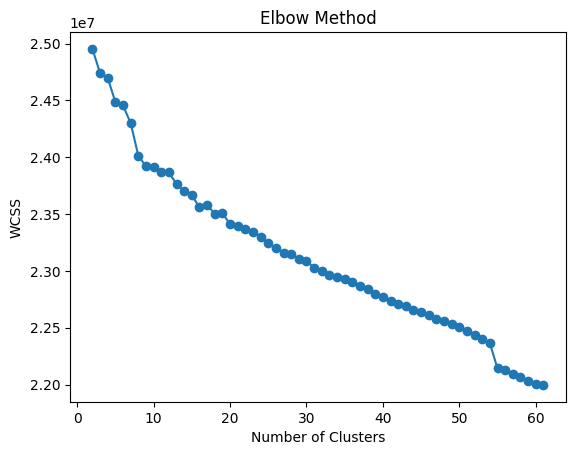

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
max_clusters = int(np.sqrt(len(train_ft)) // 2)  # 데이터 개수의 제곱근을 활용
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train_ft)
    wcss.append(kmeans.inertia_)

# WCSS 시각화
plt.plot(range(2, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

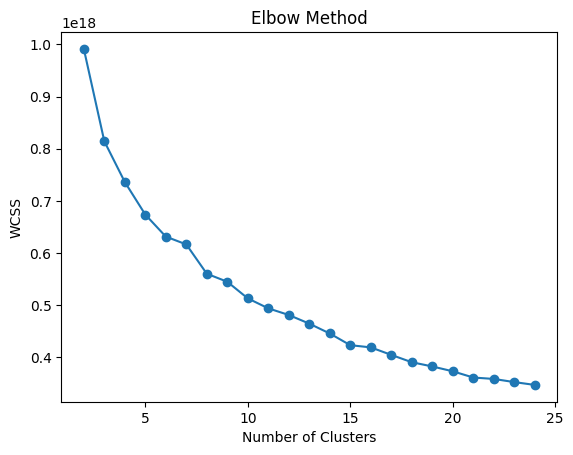

In [ ]:
# 엘보우방법
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(2,25):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train_ft)
    wcss.append(kmeans.inertia_)

# WCSS 시각화
plt.plot(range(2,25), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# KMeans 군집 분석
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    # train_ft['cluster_label'] = kmeans.fit_predict(train_ft)
    tmp = kmeans.fit_predict(train_ft)

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(train_ft, tmp)  # train_ft: 데이터, clusters: 군집 번호
    ch_score = calinski_harabasz_score(train_ft, tmp)
    db_score = davies_bouldin_score(train_ft, tmp)
    print(f"{i}, {silhouette_avg}, {ch_score}, {db_score}")


2, 0.2700486093071666, 399.9620841878461, 4.8642250131949405
3, 0.18255595741872904, 266.46843355494167, 5.22663308259021
4, 0.18150298090056485, 186.23736161353168, 3.984511399243004
5, 0.17689134916082233, 173.15956891529734, 4.283737930812171
6, 0.1764750778471223, 142.36377714960665, 3.7695985266159333
7, 0.09648965998264818, 135.33620531378256, 4.048209766144014
8, -0.01726769674306576, 142.74315512024347, 4.996170977840077
9, 0.0008044378493633534, 132.74791432457317, 4.6168771834105335


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
tmp = kmeans.fit_predict(train_ft)

# 실루엣 점수 계산
silhouette_avg = silhouette_score(train_ft, tmp)  # train_ft: 데이터, clusters: 군집 번호
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(train_ft, tmp)
print(f"Calinski-Harabasz Score: {ch_score}")

from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(train_ft, tmp)
print(f"Davies-Bouldin Score: {db_score}")


Silhouette Score: 0.2700486093071666
Calinski-Harabasz Score: 399.9620841878461
Davies-Bouldin Score: 4.8642250131949405


In [ ]:
# 스케일링 x / cluster 2
# Silhouette Score: 0.7427671237699522
# Calinski-Harabasz Score: 7450.118080745241
# Davies-Bouldin Score: 1.0843299226043102

# 스케일링 o / cluster 2
# Silhouette Score: 0.2700486093071666
# Calinski-Harabasz Score: 399.9620841878461
# Davies-Bouldin Score: 4.8642250131949405



In [ ]:
train_ft["cluster"] = tmp

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4704\2696436638.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_ft["cluster"] = tmp


In [ ]:
tmp = kmeans.predict(test_ft)

test_ft["cluster"] = tmp

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4704\717352052.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_ft["cluster"] = tmp


In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
tmp = kmeans.fit_predict(train_ft)

# 실루엣 점수 계산
silhouette_avg = silhouette_score(train_ft, tmp)  # train_ft: 데이터, clusters: 군집 번호
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(train_ft, tmp)
print(f"Calinski-Harabasz Score: {ch_score}")

from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(train_ft, tmp)
print(f"Davies-Bouldin Score: {db_score}")


Silhouette Score: 0.4060302402922668
Calinski-Harabasz Score: 3144.3951897035236
Davies-Bouldin Score: 1.4843233655578325


## DBSCAN

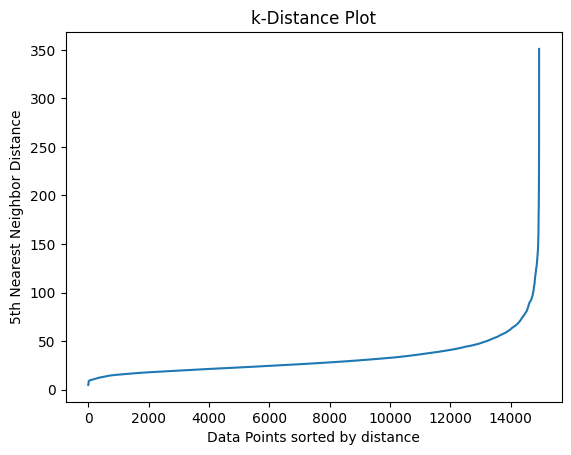

In [ ]:
# DBSCAN 하이퍼파라미터 튜닝

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# k-distance 계산 (k=min_samples)
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(scaled_data)
distances, indices = neigh.kneighbors(scaled_data)
distances = np.sort(distances[:, 4])  # 5번째 이웃 거리

# k-distance plot 그리기
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("k-Distance Plot")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_ft)

# DBSCAN 파라미터 설정
eps = 50  # k-Distance Plot 기반
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# 군집화 수행
labels = dbscan.fit_predict(scaled_data)

# 유효 클러스터 및 노이즈 비율
valid_mask = labels != -1
noise_ratio = (labels == -1).mean()
print(f"Noise Ratio: {noise_ratio:.2%}")

if len(np.unique(labels[valid_mask])) > 1:  # 적어도 2개의 클러스터가 있을 때
    silhouette_avg = silhouette_score(scaled_data[valid_mask], labels[valid_mask])
    print(f"Silhouette Score: {silhouette_avg}")

    ch_score = calinski_harabasz_score(scaled_data[valid_mask], labels[valid_mask])
    print(f"Calinski-Harabasz Score: {ch_score}")

    db_score = davies_bouldin_score(scaled_data[valid_mask], labels[valid_mask])
    print(f"Davies-Bouldin Score: {db_score}")
else:
    print("유효한 클러스터가 1개 이하로, 지표를 계산할 수 없습니다.")


Noise Ratio: 9.71%
Silhouette Score: 0.31470853840458235
Calinski-Harabasz Score: 16.27035259290367
Davies-Bouldin Score: 1.020758529583771


## yellowbrick

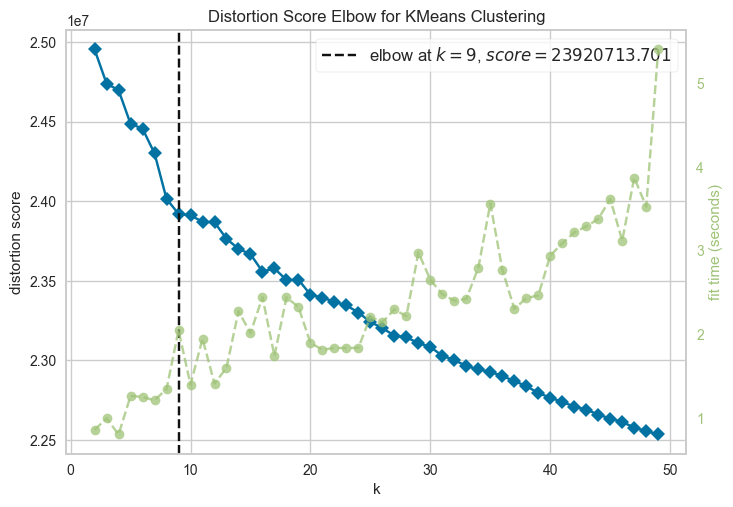

In [ ]:
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# 클러스터 객체, k = k 범위
cluster = KMeans(random_state= 42)
viz = KElbowVisualizer(cluster, k= (2,50))
viz.fit(train_ft)
viz.show()
plt.show()

# 임계값 조정

In [14]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

params = {'n_estimators': 800,
 'learning_rate': 0.04036413044768581,
 'max_depth': 4,
 'min_child_weight': 7,
 'subsample': 0.7505214930635562,
 'colsample_bytree': 0.6290102054237857,
 'gamma': 0.648553153047272}


pred_proba = []
models = []

# Stratified K-Fold 교차 검증 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 루프
for tri, vai in cv.split(train_ft, target):
    # 학습 데이터와 검증 데이터 분리
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    # 모델 초기화 및 학습
    model = XGBClassifier(**params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], verbose=False)   
    
    # 모델 저장
    models.append(model)

    # 예측 및 F1 매크로 스코어 계산
    pred_proba.append(model.predict_proba(x_valid))
    

In [24]:
pred = np.mean(
        [   pred_proba[0],
            pred_proba[1],
            pred_proba[2],
            pred_proba[3],
            pred_proba[4],
            
            ],axis=0)
pred.shape

(2988, 2)

In [30]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# 모델 예측 확률값 (예: predict_proba 결과)
proba = pred[:, 1]  # 양성 클래스의 확률값
y_true = y_valid  # 실제 타겟값

# 임계값 범위 설정
thresholds = np.arange(0.1, 0.9, 0.01)

# 각 임계값에서의 성능 저장
results = []

for threshold in thresholds:
    # 확률값 기반으로 예측 생성
    y_pred = (proba >= threshold).astype(int)
    
    # 성능 지표 계산 (F1, Precision, Recall)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    results.append((threshold, f1, precision, recall))

# 최적 임계값 찾기 (F1 기준)
best_threshold, best_f1, _, _ = max(results, key=lambda x: x[1])

# 결과 출력
print(f"최적 임계값: {best_threshold:.2f}")
print(f"F1 Score (최적): {best_f1:.4f}")

# 결과를 데이터프레임으로 정리 (선택사항)
import pandas as pd
pd.set_option('display.max_rows', None)
results_df = pd.DataFrame(results, columns=['Threshold', 'F1', 'Precision', 'Recall'])
results_df

최적 임계값: 0.42
F1 Score (최적): 0.6019


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

,Threshold,F1,Precision,Recall
0,0.10,0.286660,0.393553,0.998296
1,0.11,0.287273,0.393685,0.998296
2,0.12,0.289110,0.394082,0.998296
3,0.13,0.296833,0.395608,0.997445
4,0.14,0.300265,0.396207,0.996593
5,0.15,0.304270,0.396944,0.995741
6,0.16,0.308057,0.397480,0.994037
7,0.17,0.314743,0.398700,0.992334
8,0.18,0.324017,0.399931,0.987223
9,0.19,0.331210,0.401042,0.983816


# 점수 확인

In [ ]:
train_ft.drop(columns= "ID", inplace= True)
test_ft.drop(columns= "ID", inplace= True)

In [ ]:
cols = train_ft.select_dtypes("object").columns
cols

Index(['주구매지점', '주구매_대분류', '주구매_중분류'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

# 범주형 변수 원핫인코딩
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_ft[cols])
tmp = pd.DataFrame(
    enc.transform(train_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
train_ft = pd.concat([train_ft,tmp],axis=1).drop(columns=cols)

tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1).drop(columns=cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

# 범주형 변수 원핫인코딩
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(train_ft[cols])
tmp = pd.DataFrame(
    enc.transform(train_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
train_ft = pd.concat([train_ft,tmp],axis=1).drop(columns=cols)

tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1).drop(columns=cols)

# Min-Max Scaling
scaler = StandardScaler()
scaler.fit(train_ft)
train_ft[train_ft.columns] = scaler.transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)

# 정답 데이터
target = train_target["target"]

In [ ]:
pred_proba = model.predict_proba(test_ft)[:,1]
submit["target"] = pred_proba
submit.to_csv("6조_v3.0_proba.csv",index=False)

In [ ]:
submit["target"] = pred

submit.to_csv("6조_v3.2_1108_cluster_O.csv",index=False)

In [ ]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

params = {'n_estimators': 800,
 'learning_rate': 0.04036413044768581,
 'max_depth': 4,
 'min_child_weight': 7,
 'subsample': 0.7505214930635562,
 'colsample_bytree': 0.6290102054237857,
 'gamma': 0.648553153047272}

# F1 매크로 스코어와 모델을 저장할 리스트
scores = []
models = []

# Stratified K-Fold 교차 검증 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 루프
for tri, vai in cv.split(train_ft, target):
    # 학습 데이터와 검증 데이터 분리
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    # 모델 초기화 및 학습
    model = XGBClassifier(**params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], verbose=False)   
    
    # 모델 저장
    models.append(model)

    # 예측 및 F1 매크로 스코어 계산
    pred = model.predict(x_valid)
    score = f1_score(y_valid, pred, average='macro')
    scores.append(score)

# F1 매크로 스코어의 평균 출력
print("Mean F1 Macro Score:", np.mean(scores))

# 군집 + 스케일링X : 0.7202732642867561
# 군집 + 스케일링O : 0.7204551201238761

Mean F1 Macro Score: 0.7204551201238761


In [ ]:

params = {'n_estimators': 800,
 'learning_rate': 0.04036413044768581,
 'max_depth': 4,
 'min_child_weight': 7,
 'subsample': 0.7505214930635562,
 'colsample_bytree': 0.6290102054237857,
 'gamma': 0.648553153047272}

model = XGBClassifier(**params)
model.fit(train_ft, target)
pred = model.predict(test_ft)